## KERAS LSTM İLE UÇAK YOLCU SAYISI TAHMİN ETME

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Dense, LSTM # sinir ağı katmanlarını oluşturmak için kullanılır.
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler # veri normalizasyonu için kullanılır. Veriyi belirli bir aralıkta (0-1) ölçeklemek için kullanılır.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv("AirPassengers.csv") # kullanılacak veri setini okuma
data.head() # veri setindeki ilk beş veriyi ekrana yazdırır 

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']

In [4]:
type(data) # işlemleri rahat gerçekleştirmek için dataFrame veya numpy array kullanmalıyız.
# bunun nedeni modeli ölçeklemek için kullanacağım MinMaxScaler() dataframe veya numpy array istemektedir.

pandas.core.series.Series

In [5]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [6]:
# veri üzerinde işlemler gerçekleştirmek için numpy array dönüştürülmeli (MinMaxScaler)
data = np.array(data).reshape(-1,1) #veri tek sütunlu matris haline getirildi.

In [7]:
type(data) #numpy.ndarray

numpy.ndarray

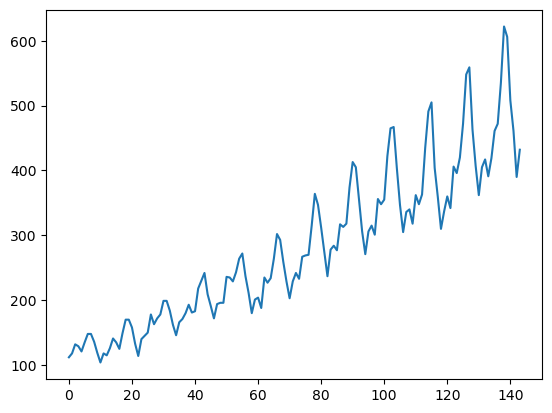

In [8]:
plt.plot(data)

plt.show() #tüm veri setini grafik üzerinde görelim...

## Ölçekleme İşlemi

In [9]:
scaler = MinMaxScaler() # veriyi ölçeklemek için kullanılır(0-1) 
data = scaler.fit_transform(data) #girdi verilerini düzenlemek ve ölçeklemek için kullanılır.

In [10]:
scaler

MinMaxScaler()

In [11]:
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

## Eğitim ve Test Verilerine Bölme

In [12]:
len(data)

144

In [13]:
train = data[0:100,:] # eğitim için 1'den 100' e kadar olan veriler
test = data[100:,:]   # test için 100'den sona kadar olan veriler

## Eğitime Uygun Veri Setlerinin Oluşturulması

In [14]:
# bu fonksiyon veri setimi eğitim seti için kullanamayacağımdan 
#eğitim seti hazırlamama yardımcı olcaktır.
def get_data(data,steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX), np.array(dataY)
#time series training için verilmesi gereken veriler burada oluşturulacak

In [15]:
steps = 2 # revize edilen adım sayısı 

### Eğitim ve Test Verileri Fonksiyon Üzerinden Oluşturuldu

In [16]:
X_train, y_train = get_data(train,steps) # eğitim verileri oluşturuldu...
X_test, y_test = get_data(test,steps)    # test verileri oluşturuldu...


In [17]:
# Bu kodlar veri setini 3D bir tensöre dönüştürmeye yönelik işlemi gerçekleştirir.
# zaman serisinde kullanılacak veri setlerinin verinin 3D bir tensör formatında olması gerekir
# model bunu istiyor
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [18]:
input_layer = Input(shape=(1, steps))
lstm_layer = LSTM(128, return_sequences=True)(input_layer)
lstm_layer = LSTM(64)(lstm_layer)
dense_layer_1 = Dense(32)(lstm_layer)
dropout_layer = Dropout(0.2)(dense_layer_1)
output_layer = Dense(1)(dropout_layer)

In [19]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
13/13 [==============================] - 4s 3ms/step - loss: 0.0406
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 13/100
13/13 [=================

In [20]:
#model.fit(X_train, y_train, epochs=100, batch_size=1)

In [21]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 3ms/step


In [22]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)  # 1D diziyi 2D dizisine dönüştür
y_test = scaler.inverse_transform(y_test)

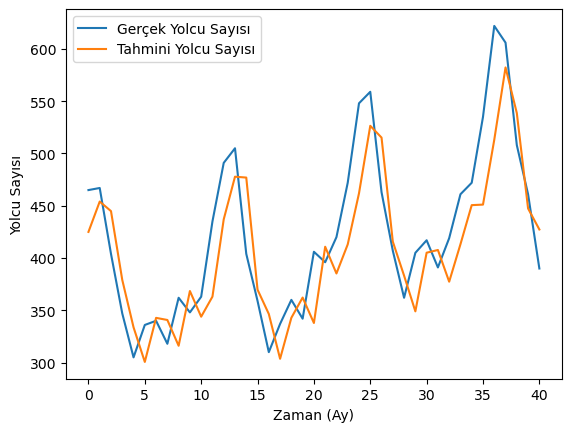

In [23]:
# Sonuçları görselleştir
plt.plot(y_test, label='Gerçek Yolcu Sayısı')
plt.plot(y_pred, label='Tahmini Yolcu Sayısı')
plt.xlabel('Zaman (Ay)')
plt.ylabel('Yolcu Sayısı')
plt.legend()
plt.show()


In [24]:
real_values = y_test[:44].reshape(-1)
real_values

array([465., 467., 404., 347., 305., 336., 340., 318., 362., 348., 363.,
       435., 491., 505., 404., 359., 310., 337., 360., 342., 406., 396.,
       420., 472., 548., 559., 463., 407., 362., 405., 417., 391., 419.,
       461., 472., 535., 622., 606., 508., 461., 390.])

In [25]:
predicted_values = y_pred[:44].reshape(-1)
predicted_values

array([424.98773, 454.01822, 444.87668, 379.05774, 333.76996, 300.64606,
       342.78394, 340.7611 , 316.1088 , 368.45142, 343.9076 , 363.07733,
       437.00394, 477.79694, 476.96744, 369.75632, 346.49792, 303.64807,
       342.8586 , 362.21185, 337.8818 , 410.8096 , 385.2416 , 413.04602,
       461.88257, 526.4708 , 515.1923 , 415.69336, 383.14685, 349.00974,
       405.1044 , 407.69806, 377.38217, 413.1886 , 450.59192, 451.11218,
       513.1139 , 582.3032 , 538.6812 , 447.38837, 427.32944],
      dtype=float32)